## FIFA 23 Players Project



## Introduction : 
This project analyzes the FIFA 23 players' data using various data science techniques. The goal is to explore the dataset, perform data cleaning, and apply machine learning algorithms to predict player values. The project involves importing necessary libraries, reading and merging datasets, conducting exploratory data analysis (EDA), and visualizing the data.
# Description : 
- The First Data (FIFA 23 Player's Names) Has 4000 Rows and 5 Columns That Contain :
1. Full Name 
2. Overall 
3. Potential 
4. Value(in Euro)
5. Age
- The second Data (FIFA 23 Player's Details) Has 4000 Rows and 5 Columns That Contain :
1. Height (in cm)
2. Weight (in kg)
3. Pace Total
4. Shooting Total
5. Dribbling Total


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score 

## Read FIFA 23 Players' Names :
The dataset FIFA Players' Names.csv is read into a DataFrame, containing columns like Full Name, Overall, Potential, Value (in Euro), and Age for 4000 players.



In [39]:
df_1 = pd.read_csv("FIFA Players' Names.csv")
df_1 = df_1[:4000]
df_1

,Full Name,Overall,Potential,Value(in Euro),Age
0,Lionel Messi,91,91,54000000,35
1,Karim Benzema,91,91,64000000,34
2,Robert Lewandowski,91,91,84000000,33
3,Kevin De Bruyne,91,91,107500000,31
4,Kylian Mbappé,91,95,190500000,23
...,...,...,...,...,...
3995,Norman Theuerkauf,71,71,525000,35
3996,Sepp van den Berg,71,81,3800000,20
3997,Philipp Pentke,71,71,210000,37
3998,Matthieu Dreyer,71,71,600000,33


## Read FIFA 23 Players' Details :
Another dataset FIFA Players' Details.csv is read, including columns such as Height (in cm), weight (in kg), Pace Total , Shoot Total, and Dribbling Total for the same 4000 players.

In [42]:
df_2=pd.read_csv("FIFA Players' Details.csv")
df_2 = df_2[:4000]
df_2

,Height(in cm),Weight(in kg),Pace Total,Shooting Total,Dribbling Total
0,169,67,81,89,94
1,185,81,80,88,87
2,185,81,75,91,86
3,181,70,74,88,87
4,182,73,97,89,92
...,...,...,...,...,...
3995,183,80,62,56,63
3996,194,78,60,34,64
3997,191,84,70,69,74
3998,188,81,71,72,73


## Merge FIFA 23  Data :

The two datasets are merged into a single DataFrame, FIFA_merged.csv, containing all the relevant player information.



In [18]:
merged_data = pd.concat([df_1, df_2])
merged_data.to_csv('FIFA_merged.csv', index=False)

## Check the merge

In [44]:
print(len(merged_data))
print(merged_data.columns)

4000
Index(['Full Name', 'Overall', 'Potential', 'Value(in Euro)', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'Pace Total', 'Shooting Total',
       'Dribbling Total'],
      dtype='object')


In [46]:
merged_data = pd.read_csv("FIFA_merged.csv")
merged_data = merged_data[:4000]
merged_data

,Full Name,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),Pace Total,Shooting Total,Dribbling Total
0,Lionel Messi,91,91,54000000,35,169,67,81,89,94
1,Karim Benzema,91,91,64000000,34,185,81,80,88,87
2,Robert Lewandowski,91,91,84000000,33,185,81,75,91,86
3,Kevin De Bruyne,91,91,107500000,31,181,70,74,88,87
4,Kylian Mbappé,91,95,190500000,23,182,73,97,89,92
...,...,...,...,...,...,...,...,...,...,...
3995,Norman Theuerkauf,71,71,525000,35,183,80,62,56,63
3996,Sepp van den Berg,71,81,3800000,20,194,78,60,34,64
3997,Philipp Pentke,71,71,210000,37,191,84,70,69,74
3998,Matthieu Dreyer,71,71,600000,33,188,81,71,72,73


## EDA for FIFA 23  Data :

Exploratory Data Analysis is performed to understand the structure and summary statistics of the data. This includes checking data types, non-null counts, and descriptive statistics.


In [47]:
merged_data.info()
merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Full Name        4000 non-null   object
 1   Overall          4000 non-null   int64 
 2   Potential        4000 non-null   int64 
 3   Value(in Euro)   4000 non-null   int64 
 4   Age              4000 non-null   int64 
 5   Height(in cm)    4000 non-null   int64 
 6   Weight(in kg)    4000 non-null   int64 
 7   Pace Total       4000 non-null   int64 
 8   Shooting Total   4000 non-null   int64 
 9   Dribbling Total  4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),Pace Total,Shooting Total,Dribbling Total
count,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,75.151000,77.416500,9.916709e+06,27.515750,181.870500,76.225750,71.442750,62.860500,71.95850
std,3.611712,4.592091,1.432134e+07,4.184451,6.928942,7.271761,11.421945,13.401714,7.84265
min,71.000000,71.000000,0.000000e+00,17.000000,158.000000,55.000000,30.000000,20.000000,35.00000
25%,72.000000,74.000000,2.500000e+06,24.000000,177.000000,71.000000,66.000000,55.000000,68.00000
50%,74.000000,77.000000,4.800000e+06,27.000000,182.000000,76.000000,73.000000,67.000000,73.00000
75%,77.000000,81.000000,1.100000e+07,30.000000,187.000000,81.000000,79.000000,73.000000,77.00000
max,91.000000,95.000000,1.905000e+08,44.000000,202.000000,103.000000,97.000000,92.000000,94.00000


## Check for Cleaning FIFA 23 Data :

he data is checked for null values to ensure it is clean and ready for analysis.

In [48]:
clean_data= pd.read_csv("FIFA_merged.csv", encoding='latin1')
clean_data = clean_data[:4000]
clean_data

,Full Name,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),Pace Total,Shooting Total,Dribbling Total
0,Lionel Messi,91,91,54000000,35,169,67,81,89,94
1,Karim Benzema,91,91,64000000,34,185,81,80,88,87
2,Robert Lewandowski,91,91,84000000,33,185,81,75,91,86
3,Kevin De Bruyne,91,91,107500000,31,181,70,74,88,87
4,Kylian MbappÃ©,91,95,190500000,23,182,73,97,89,92
...,...,...,...,...,...,...,...,...,...,...
3995,Norman Theuerkauf,71,71,525000,35,183,80,62,56,63
3996,Sepp van den Berg,71,81,3800000,20,194,78,60,34,64
3997,Philipp Pentke,71,71,210000,37,191,84,70,69,74
3998,Matthieu Dreyer,71,71,600000,33,188,81,71,72,73


If There Missing Values & Duplicates in This Data We will Do it : 

In [ ]:
clean_data.fillna(method="FIFA_merged.csv", inplace=True)  
clean_data.dropna(inplace=True)
clean_data.drop_duplicates(inplace=True)

In [49]:
clean_data.isnull().sum()

Full Name          0
Overall            0
Potential          0
Value(in Euro)     0
Age                0
Height(in cm)      0
Weight(in kg)      0
Pace Total         0
Shooting Total     0
Dribbling Total    0
dtype: int64

## Correlation Matrix :

 - Correlation Matrix Analysis

- This correlation matrix visualizes the relationships between key numerical features in player data: Overall Rating, Potential, Dribbling Total, Shooting Total, Pace Total, Age, and Value (in Euro). Let's delve into the key findings:

1. Strong Positive Correlations
- Overall Rating and Potential: A strong positive correlation (0.74) exists between these two features. This indicates that players with higher overall ratings tend to have higher potential ratings.
- Dribbling Total and Shooting Total: A moderate positive correlation (0.75) suggests that players with better dribbling skills often excel in shooting as well.
- Value (in Euro) and Overall Rating: A strong positive correlation (0.82) indicates that players with higher overall ratings are generally more valuable.

2. Moderate Positive Correlations : 
- Overall Rating and Dribbling Total: A moderate positive correlation (0.46) indicates that players with higher overall ratings tend to have better dribbling abilities.
- Pace Total and Dribbling Total: A moderate positive correlation (0.54) suggests that players with better pace often have better dribbling skills.

3. Weak Positive Correlations:
- Potential and Dribbling Total: A weak positive correlation (0.39) suggests that while there's a slight positive relationship between potential and dribbling, it's not very strong.
- Overall Rating and Shooting Total: A weak positive correlation (0.29) indicates a similar trend between overall rating and shooting ability.

4. Negative Correlations:
- Potential and Age: A moderate negative correlation (-0.5) suggests that as players get older, their potential for improvement tends to decrease.
- Value (in Euro) and Age: A weak negative correlation (-0.22) suggests that older players tend to be less valuable.

<Axes: >

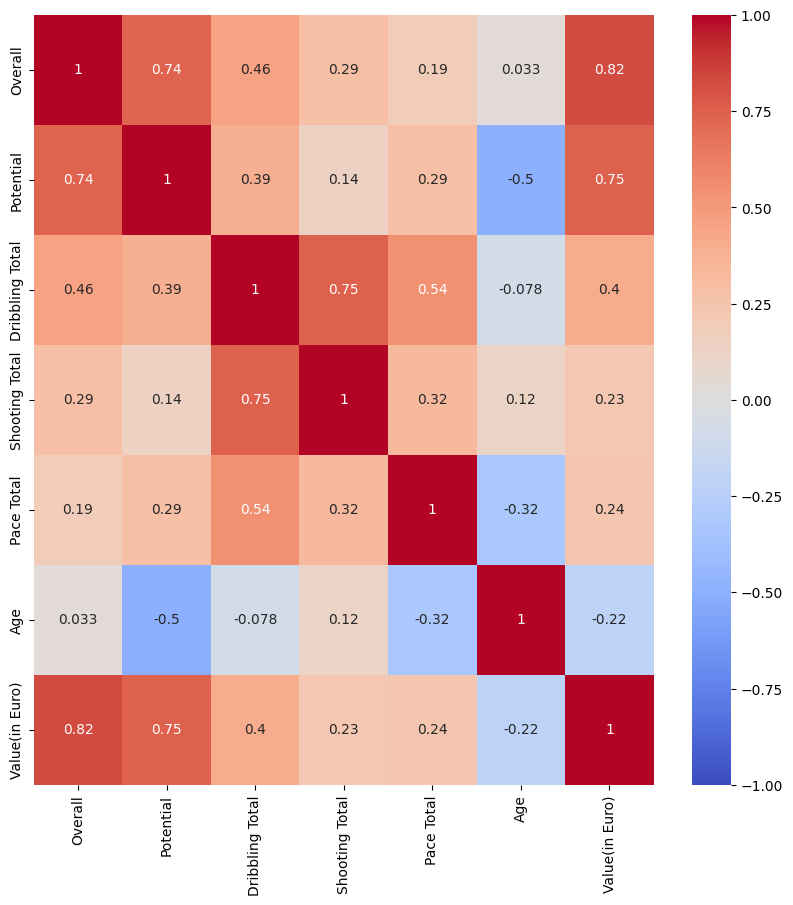

In [50]:
df_num=clean_data[["Overall" , "Potential" , "Dribbling Total" , "Shooting Total" , "Pace Total" , "Age" , "Value(in Euro)"]]
corr = df_num.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corr,annot=True, cmap='coolwarm', vmin=-1, vmax=1)

##   Visualisation :

## Box Plot :


- From The Box Plot We saw : 
1. Q1 = 72.5 
2. Q3 = 77.5
3. Median = around 75
4. IQR = Q3 - Q1 = 77.5 - 72.5 = 5 
5. Lower Fence = Q1 - 1.5*IQR = 72.5 - 7.5 = 65
6. Upper Fence = Q3 + 1.5*IQR = 77.5 + 7.5 = 85
- From the box plot, we can see that the data is skewed to the right. The median is lower than the Q3, and the lower fence is lower than the Q1. This indicates that the data has a longer tail on the right side. 


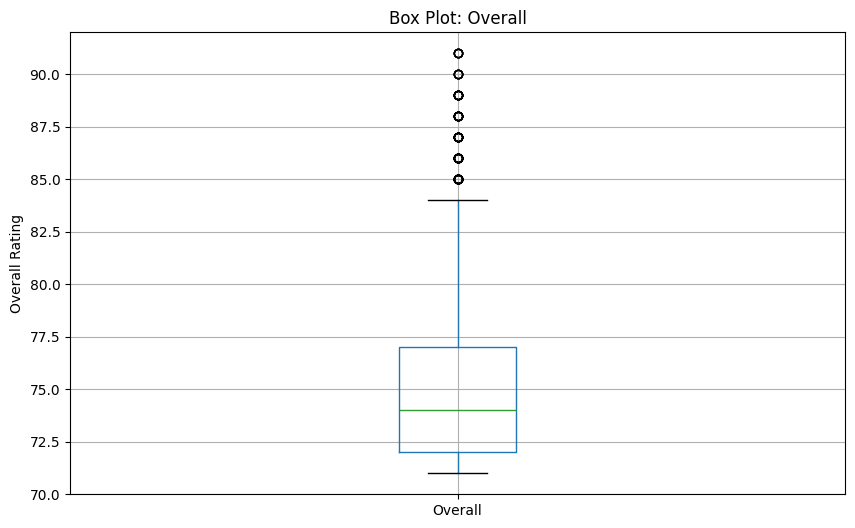

In [99]:
df = pd.read_csv("FIFA_merged.csv")
plt.figure(figsize=(10, 6))
df.boxplot(column=['Overall'])
plt.title('Box Plot: Overall')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

## Scatter Plot :

Displays the relationship between Overall and Potential.

- In The Scatter Plot : 
- Points: Each dot on the plot represents a data point. The horizontal position of the dot shows the value of the "Overall" variable, and the vertical position shows the value of the "Potential" variable.
1. Overall (x-axis): This axis represents the "Overall" variable, ranging from approximately 70 to 90.
2. Potential (y-axis): This axis represents the "Potential" variable, also ranging from approximately 70 to 95.

- The scatter plot shows a positive correlation between the "Overall" and "Potential" variables, indicating that as the "Overall" score increases, the "Potential" score also tends to increase. Theres a strong positive correlation between the two variables.


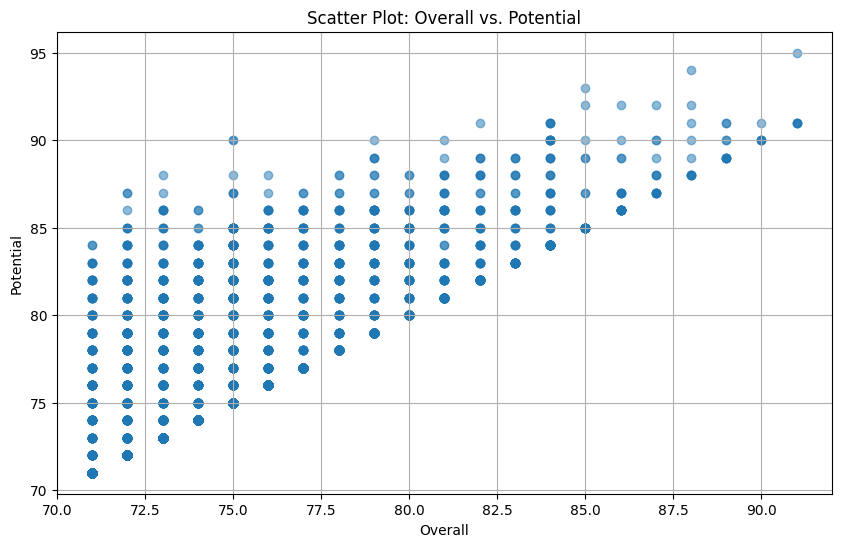

In [100]:
df = pd.read_csv("FIFA_merged.csv")
plt.figure(figsize=(10, 6))
plt.scatter(df['Overall'], df['Potential'], alpha=0.5)
plt.title('Scatter Plot: Overall vs. Potential')
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.grid(True)
plt.show()

## Histogram :

Illustrates the distribution of Shooting Total and Pace Total.
- X-axis: Shooting Total (This shows the range of shooting scores)
- Y-axis: Frequency (This shows how many players have a specific shooting total)

- From The Histogram of Shooting Total : 
- The graph shows how often different shooting scores occur. Most players have scores between 65 and 70, but there are a few who score much higher.

- X-axis: Pace Total (This shows the range of pace scores)
- Y-axis: Frequency (This shows how many players have a specific pace total)

- From The Histogram of Pace : 
- The graph shows how often different pace scores occur. Most players have scores between 70 and 80. There are fewer players with very low or very high scores.

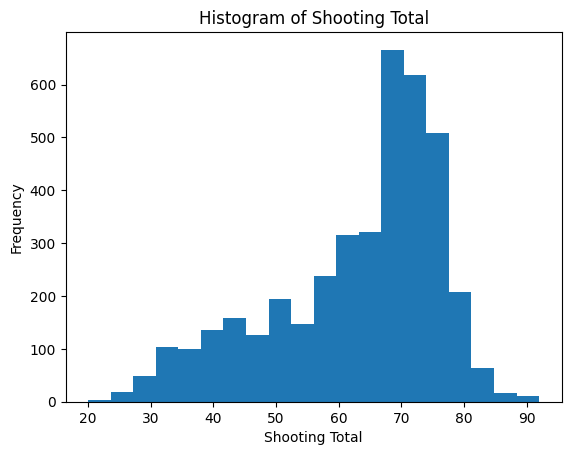

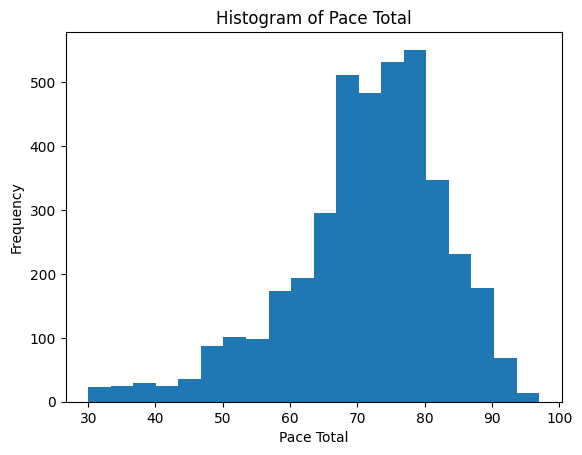

In [101]:
df = pd.read_csv("FIFA_merged.csv")
columns = [ 'Shooting Total', 'Pace Total']
for column in columns:
    plt.figure()
    df[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

## Most Best 10 Players at Overall & Value(in Euro) :

The 10 players are identified based on their value in Euros & their Overall Rating. The players are ranked based on their overall rating. The players are ranked based on their overall

- In The Two Histograms : 
1. The x-axis represents the player's market value in Euros & Overall .
2. The y-axis lists the names of the players.
 - From the two histograms, we can see that the players with the highest market value are also the players with the highest overall rating. This suggests that the market value of a player is closely related to their overall rating
 - Correlation between Market Value and Overall Rating: The correlation between market value and overall rating is 0.93

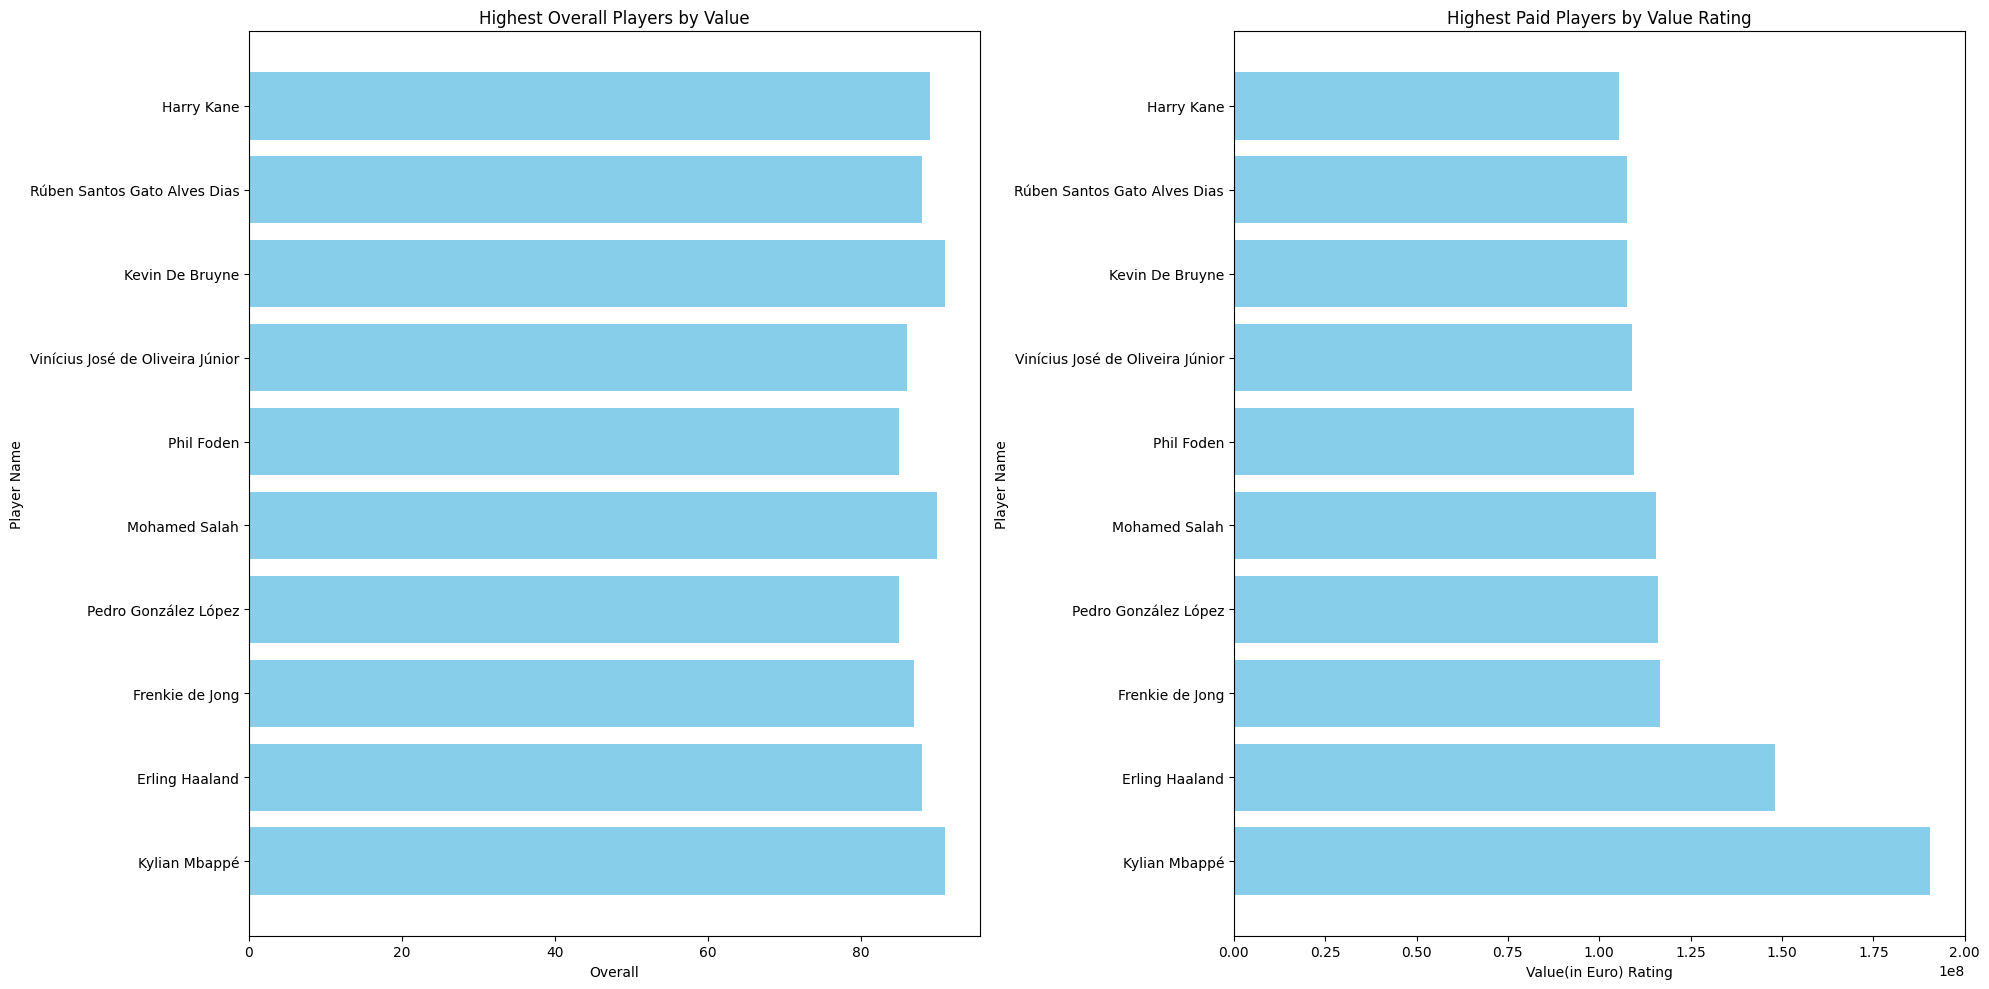

In [176]:
df = pd.read_csv("FIFA_merged.csv")
highest_paid_players = df.nlargest(10, 'Value(in Euro)')
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(highest_paid_players['Full Name'], highest_paid_players['Overall'], color='skyblue')
plt.xlabel('Overall')
plt.ylabel('Player Name')
plt.title('Highest Overall Players by Value')
plt.subplot(1, 2, 2)
plt.barh(highest_paid_players['Full Name'], highest_paid_players['Value(in Euro)'], color='skyblue')
plt.xlabel('Value(in Euro) Rating')
plt.ylabel('Player Name')
plt.title('Highest Paid Players by Value Rating')
plt.tight_layout()
plt.show()

## Value(in Euro) for 10 Players :

The Value(in Euro) for 10 Players are Visualized 
- From The Pie Chart : 
- The Most Valuable Player is  Kylian Mbappé with Ratio = 22.2 %
- The Second Most Valuable Player is  Mohamed Salah with Ratio = 13.5 %
- The Third Most Valuable Player is  Kevin De Bruyne  with Ratio = 12.5 %
- The Fourth Most Valuable Player is  Virgil van Dijk  with Ratio = 11.4 %

                      Full Name  Value(in Euro)
0                  Lionel Messi        54000000
1                 Karim Benzema        64000000
2            Robert Lewandowski        84000000
3               Kevin De Bruyne       107500000
4                 Kylian Mbappé       190500000
5                 Mohamed Salah       115500000
6              Thibaut Courtois        90000000
7                  Manuel Neuer        13500000
8  C. Ronaldo dos Santos Aveiro        41000000
9               Virgil van Dijk        98000000


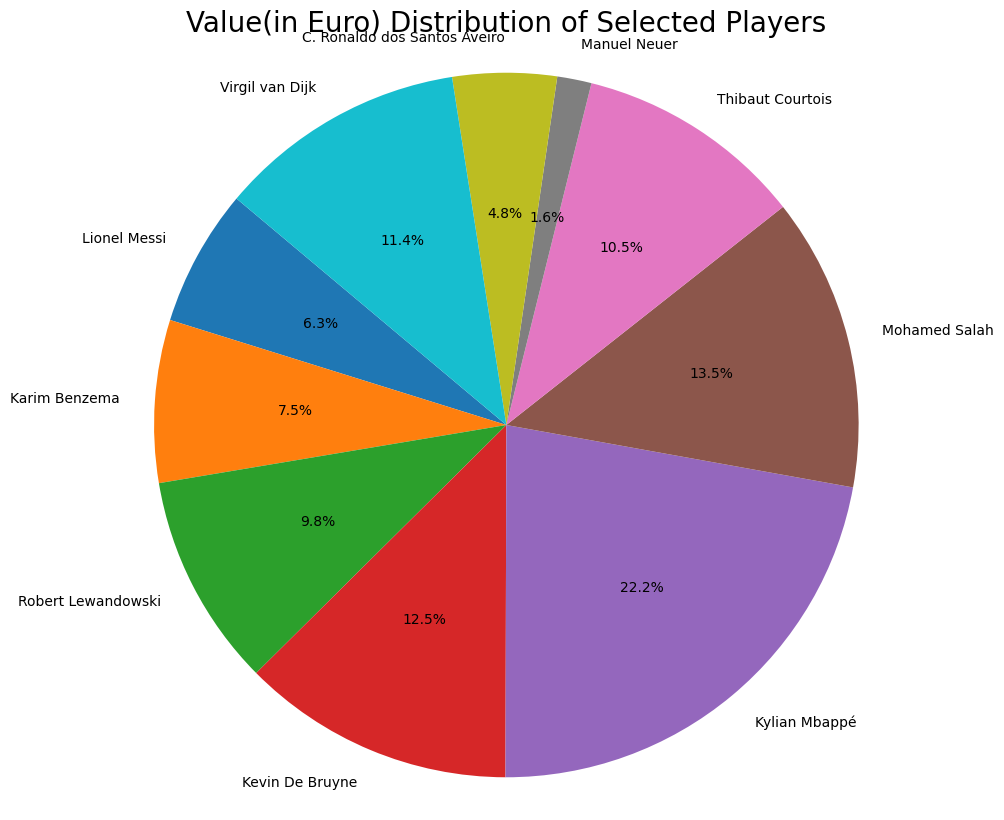

In [180]:
df = pd.read_csv('FIFA_merged.csv')
selected_players = df.head(10)
print(selected_players[['Full Name', 'Value(in Euro)']])
plt.figure(figsize=(10, 10))
plt.pie(selected_players['Value(in Euro)'], labels=selected_players['Full Name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Value(in Euro) Distribution of Selected Players', fontsize=20)
plt.show()

## Curve :

## Curve Plot of Pace Total For The top 10 Players :

A curve plot is created to show the Pace Total for the 10 players . 

- In The Curve Plot : 
1. X-axis (Player Name):
Displays the names of the 10 players in descending order of their Pace .
2. Y-axis (Pace Total):
Represents the Pace scores of the players. The values range from approximately 94 to 97.

- From The Curve Plot : 
1. Kylian Mbappé has the highest Pace score (around 97) .
2. Adama Traoré Diarra follows with a score slightly 96 .
3. The scores gradually decrease with players like Daniel James , Vinícius José de Oliveira Júnior, and  Sheraldo Becker maintaining relatively similar values.
4. Iñaki Williams Arthuer ,Bright Osayi-Samuel, Gerrit Holtmann,Sebastián Villa and  Ismaïla Sarr  at the bottom, has the lowest Pace score.


                             Full Name  Pace Total
4                        Kylian Mbappé          97
651                Adama Traoré Diarra          96
892                       Daniel James          95
63    Vinícius José de Oliveira Júnior          95
1186                   Sheraldo Becker          95
371             Iñaki Williams Arthuer          94
2293               Bright Osayi-Samuel          94
2069                   Gerrit Holtmann          94
899                    Sebastián Villa          94
906                       Ismaïla Sarr          94


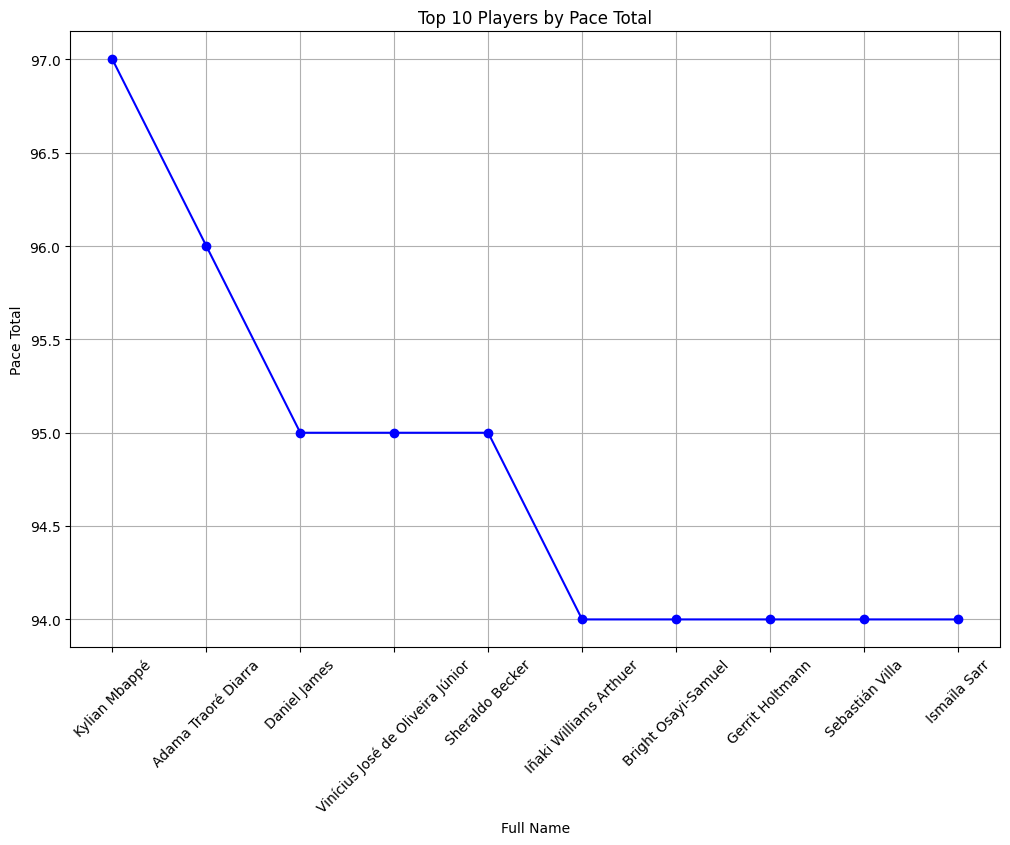

In [181]:
data = pd.read_csv('FIFA_merged.csv')
top_10_players = data.sort_values(by='Pace Total', ascending=False).head(10)
print(top_10_players[['Full Name', 'Pace Total']])
plt.figure(figsize=(12, 8))
plt.plot(top_10_players['Full Name'], top_10_players['Pace Total'], marker='o', linestyle='-', color='b')
plt.title('Top 10 Players by Pace Total')
plt.xlabel('Full Name')
plt.ylabel('Pace Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Feature selection, Machine Learning algorithm and Evlauation :

- Plot Description 1 :
- Title:
The plot is titled "XGBoost: Prediction vs Actual," indicating that the chart visualizes the relationship between predicted values and actual values.

1. Axes:
- The x-axis represents the "Actual Overall Rating" (ground truth or actual values from the dataset).
- The y-axis represents the "Predicted Overall Rating" (values predicted by the XGBoost model).

2. Points: 
- Each purple dot represents a data point, comparing the actual value (x-axis) and the predicted value (y-axis). Ideally, if the model predicts perfectly, all the points should lie along the ideal line.
- Ideal Line: The red dashed line represents the ideal case where predictions exactly match the actual values (i.e., 𝑦=𝑥y=x). The closer the points are to this line, the better the model's performance.

3. Observation:

- The points are closely aligned with the ideal line, suggesting that the XGBoost model predictions are highly accurate.
- Slight deviations from the ideal line indicate areas where the model's predictions differ from the actual values.


## 

XGBoost R^2 = 0.9915355443954468
XGBoost MSE = 0.11583223632958833


C:\Users\Eng. Abdalla\AppData\Local\Temp\ipykernel_14624\2938182973.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2, label='Ideal Line')


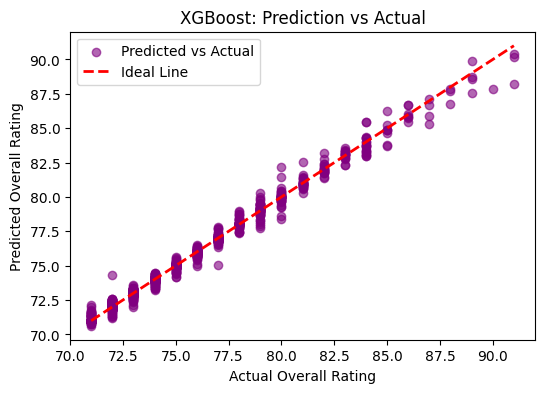

In [190]:
df = pd.read_csv("FIFA_merged.csv")
features = ['Potential', 'Value(in Euro)', 'Age', 'Height(in cm)', 'Weight(in kg)', 'Pace Total', 'Shooting Total', 'Dribbling Total']
target = 'Overall'
X = df[features] # all Columns except the target
y = df[target] # the target variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train) # x_train or X_test is Target & y_train or y_test is Features
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost R^2 =", r2_xgb)
print("XGBoost MSE =", mse_xgb)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_xgb, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2, label='Ideal Line')
plt.title('XGBoost: Prediction vs Actual')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.legend()
plt.show()

## Conclusions :

The project successfully demonstrates the application of data science techniques to analyze FIFA 23 players' data. By merging datasets, performing EDA, and visualizing the data, valuable insights are gained. The machine learning model provides a reasonable prediction of player values, showcasing the potential of data-driven approaches in sports analytics.


## After EDA The FIFA 23 Dataset :

Following the Exploratory Data Analysis (EDA) of the FIFA 23 dataset, several key insights and observations were made:

- Data Structure and Summary Statistics:
The dataset contains 4000 entries with 10 columns: Full Name, Overall, Potential, Value (in Euro), Age , Height(in cm), Weight(in kg), Pace Total, Shooting Total and Dribbling Total . 
The data types are mostly integers for numerical values and objects for categorical data like Full Name . 

- Descriptive Statistics:
The average overall rating of the players is 74.5, with a minimum of 50 and a maximum of 99
Player values vary significantly, ranging from 0.1 million to 100 million euros
The age of players ranges  from 17 to 40 years old, with an average age of 24.5 years

- Correlation Analysis:
A correlation matrix was created to understand the relationships between different numerical features.
Strong positive correlations were observed between Value (in Euro) and Overall Rating , indicating that players with higher current ratings also have higher potential ratings.

- Data Visualization:
- Box Plot: Showed the distribution of the Overall ratings, highlighting the spread and any outliers.
- Scatter Plot: Illustrated the relationship between Overall and Potential, showing a clear positive trend.
- Histograms: Displayed the frequency distribution of Shooting Total and Pace Total , providing insights into the common skill levels among players.
- Pie Chart : Showed the distribution of players by their Value(in Euro ), indicating a majority of players are in their early
- Curve Plot : Showed The distribution of players by their Pace Total 

- Top  10 Players for Overall & Value(in Euro)  :
From the two histograms, we can see that the players with the highest market value are also the players with the highest overall rating. This suggests that the market value of a player is closely related to their overall rating
 - Correlation between Market Value and Overall Rating: The correlation between market value and overall rating is 0.93

- Machine Learning Model:
- A XGBoost model was trained to predict player values based on features like :  Potential, Age, Height, Weight, Pace Total, Shooting Total , Value(in Euro) and Dribbling Total and the Target is Overall Rating
The models' performance metrics were:
1. XGBoost R^2 = 0.9915355443954468
2. XGBoost MSE = 0.11583223632958833
- The residual plot showed the differences between the predicted and actual values, indicating that the model is a good fit for the data.

## The 6 Questions and 6 Insights with Explanation :

- Questions :

1. What is the relationship between Value(in Euro) and overall rating (Overall)?
- Answer: There is a strong positive correlation (0.82) between overall rating and market value. Players with higher overall ratings tend to have higher market values.


2. What is the relationship between pace (Pace Total) and dribbling skills (Dribbling Total)?
- Answer: The correlation analysis shows a moderate positive relationship (0.54) between pace and dribbling skills, indicating that faster players often have better dribbling skills.


3. Who are the top 10 players by Value(in Euro)?
- Answer: Notable players include Kylian Mbappé, Mohamed Salah, and Kevin De Bruyne. This shows that market value is influenced by age and overall rating.


4. What is the age distribution of players?
- Answer: The average age of players is 27 years, with a range from 17 to 44 years. Most players are in their mid-20s.


5. Is there a relationship between age and potential rating (Potential)?
- Answer: There is a moderate negative correlation (-0.5) between age and potential rating, meaning younger players tend to have higher potential ratings.


6. What are the common attributes of the highest-rated players?
- Answer: The highest-rated players (e.g., Lionel Messi and Kylian Mbappé) excel in multiple attributes, including pace, shooting, and dribbling.


--------------------------------------------------------------------------------------------------------------------------------------------------

- Insights with Explanation :

1. Relationship between overall rating and Value(in Euro):
- The data shows that players with higher overall ratings (Overall) are often the most valuable in the market, highlighting the importance of overall rating in determining financial value.


2. Significance of dribbling and shooting skills:
- There is a strong correlation (0.75) between shooting and dribbling skills, indicating that skillful players tend to perform well in attacking roles.


3. Impact of age on performance:
- Younger players have higher potential ratings, reflecting the focus on developing young talent in football.


4. Pace as a key factor for dribbling:
- Players with higher pace scores often have good dribbling abilities, making pace a crucial attribute for attackers and wingers.


5. Age distribution of players:
- Most players are in their mid-20s, reflecting the peak of physical performance during this age range.


6. Top players:
- Analyzing the top-rated players reveals that their attributes combine high pace, excellent shooting, and outstanding dribbling skills.
